In [1]:
import pandas as pd
import numpy as np
from common_function.my_tfidf import *
import collections

In [2]:
train_label_df=pd.read_csv("dataset/training.txt",sep=" ",header=None)
train_label_df=train_label_df.set_index(keys=0,drop=True).drop(axis=1,columns=16)  
train_label_df.index.name="class"
output_sample=pd.read_csv("dataset/hw3_sam.csv").set_index("id")


In [3]:
np.zeros(1095)
text_class=pd.Series(np.zeros(1095),index=pd.Index(range(1,1096)),name="text_class")
for i in (range(1,14)):
    text_class.loc[train_label_df.loc[i,:].values]=i
    text_class=text_class.astype(int)

In [4]:
N=1095
text_s=pd.Series(name="text_s")
text_noisefree_s=pd.Series(name="text_noisefree_s")
text_noisefreetext_s=pd.Series(name="text_noisefreetext_s")
corpus=Counter()
for i in range(1,N+1):
    text=get_text_data(i,ROOT="dataset/IRTM/")
    text_s.at[i]=text
    noisefree_list=tokenize_to_list(text,stem=True)
    text_noisefree_s.at[i]=noisefree_list
    corpus.update(noisefree_list)

In [5]:
stopwords=[word for word ,times in corpus.most_common(100)]
for i in range(1,N+1):
    text_list=tokenize_to_list(text_s[i],stem=True,stopwords=stopwords)
    text_noisefree_s.at[i]=(text_list)
    text_noisefreetext_s.at[i]=' '.join(text_list)
    

In [6]:
full_text_df=pd.concat([text_s,text_noisefree_s,text_noisefreetext_s,text_class],axis=1)

# try some packeges
## from textblob.classifiers import NaiveBayesClassifier as NBC

In [8]:
from textblob.classifiers import NaiveBayesClassifier as NBC
textblob_train_corpus=list()
text_class_df=pd.concat([text_noisefreetext_s,text_class],axis=1)
train_df=text_class_df.loc[text_class_df['text_class']!=0]
test_df=text_class_df.loc[text_class_df['text_class']==0]
for i in train_df.index:
    textblob_train_corpus.append((train_df.loc[i,'text_noisefreetext_s'],str(train_df.loc[i,'text_class'])))
model=NBC(textblob_train_corpus)    

In [9]:
NBCoutput=output_sample
for i in test_df.index:
    NBCoutput.loc[i,"Value"]=model.classify(test_df.loc[i,'text_noisefreetext_s'])

In [10]:
NBCoutput.to_csv("answer/NBC_answer.csv")

## TfidfVectorizer feat.SVM
### from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(stop_words=stopwords,min_df=3)
corpus = text_noisefreetext_s
X = tf_idf_vectorizer.fit(corpus)
X

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['the', 'of', 'to', 'in', 'a', 'and', 'that', 'wa', 'for', 'said', 'on', 'he', 'it', 'is', 'with', 'hi', 'as', 'have', 'at', 'be', 'from', 'i', 'but', 'by', 'were', 'they', 'had', 'who', 'ha', 'not', 'an', 'are', 'we', 'presid', 'thi', 'been', 'state', 'will', 'there', 'one', 'say', 'woul...'them', 'so', 'kill', 'yemen', 'just', 'nation', 'investig', 'forc', 'did', 'over', 'offic', 'hous'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
tf_idf_vectorizer.transform(corpus)

<1095x6274 sparse matrix of type '<class 'numpy.float64'>'
	with 179121 stored elements in Compressed Sparse Row format>

### from sklearn import svm
import TfidfVectorizer from sklearn.metrics
import classification_report


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm

In [35]:
train_data=train_df['text_noisefreetext_s']
train_labels=train_df['text_class']
test_data=test_df['text_noisefreetext_s']

In [15]:
# Create feature vectors 
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
# Train the feature vectors
vectorizer.fit(train_data.append(test_data))
train_vectors = vectorizer.transform(train_data)
# Apply model on test data 
test_vectors = vectorizer.transform(test_data)

In [20]:
# Perform classification with SVM, kernel=linear 
svc_model = svm.LinearSVC() 
svc_model.fit(train_vectors, train_labels) 
prediction = svc_model.predict(test_vectors)


# print (classification_report(test_labels, prediction))

In [21]:
SVMoutput=output_sample
SVMoutput['Value']=prediction
SVMoutput.to_csv("answer/SVM_answer.csv")

## LDA 
### preprocess for lda

In [32]:
from gensim.models import Word2Vec
# preprocessing imports
from sklearn.preprocessing import LabelEncoder

from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV

# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline
sns.set()  # defines the style of the plots to be seaborn style

In [51]:
raw_train_data=full_text_df.loc[:,['text_s','text_class']]
raw_train_data.text_class.value_counts().index

Int64Index([0, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], dtype='int64')

[Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

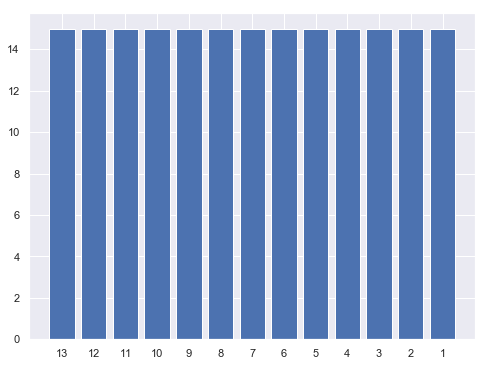

In [54]:
fig ,ax =plt.subplots(1,1,figsize=(8,6))
class_vc=train_df.text_class.value_counts()
ax.bar(range(13),class_vc)
ax.set_xticks(range(13))
ax.set_xticklabels(class_vc.index)

In [72]:
our_special_word = 'qwerty'

def remove_ascii_words(df):
    """ removes non-ascii characters from the 'texts' column in df.
    It returns the words containig non-ascii characers.
    """
    non_ascii_words = []
    for i in range(1,1+len(df)):
        for word in df.loc[i, 'text_s'].split(' '):
            if any([ord(character) >= 128 for character in word]):
                non_ascii_words.append(word)
                df.loc[i, 'text_s'] = df.loc[i, 'text_s'].replace(word, our_special_word)
    return non_ascii_words

def get_good_tokens(sentence):
    replaced_punctation = list(map(lambda token: re.sub('[^0-9A-Za-z!?]+', '', token), sentence))
    removed_punctation = list(filter(lambda token: token, replaced_punctation))
    return removed_punctation

def w2v_preprocessing(df):
    """ All the preprocessing steps for word2vec are done in this function.
    All mutations are done on the dataframe itself. So this function returns
    nothing.
    """
    df['text_s'] = df.text_s.str.lower()
    df['document_sentences'] = df.text_s.str.split('.')  # split texts into individual sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(nltk.word_tokenize, sentences)),
                                         df.document_sentences))  # tokenize sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(get_good_tokens, sentences)),
                                         df.tokenized_sentences))  # remove unwanted characters
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(filter(lambda lst: lst, sentences)),
                                         df.tokenized_sentences))  # remove empty lists
#w2v would like to have document_sentences and tokenized_sentences###need sentence information
#while lda only need text be token to words ###
def lda_get_good_tokens(df):
    df['text_s'] = df.text_s.str.lower()
    df['tokenized_text'] = list(map(nltk.word_tokenize, df.text_s))
    df['tokenized_text'] = list(map(get_good_tokens, df.tokenized_text))



Replaced 0 words with characters with an ordinal >= 128 in the train data.


1. w2v would like to have document_sentences and tokenized_sentences###need sentence information
1. while lda only need text be token to words ###
1. for lda we do stem and remove stop words 

In [73]:
non_ascii_words = remove_ascii_words(raw_train_data)
w2v_preprocessing(raw_train_data)
lda_get_good_tokens(raw_train_data)
print("Replaced {} words with characters with an ordinal >= 128 in the train data.".format(len(non_ascii_words)))
raw_train_data['stemmed_text']=text_noisefree_s

### from gensim.corpora import Dictionary

In [82]:
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore

def document_to_bow(df):
    df['bow']=df.stemmed_text.apply(dictionary.doc2bow)
    
dictionary = Dictionary(documents=raw_train_data.stemmed_text.values)
print("Found {} words.".format(len(dictionary.values())))
dictionary.filter_extremes(no_above=0.8, no_below=3)
dictionary.compactify()  # Reindexes the remaining words after filtering
print("Left with {} words.".format(len(dictionary.values())))
document_to_bow(raw_train_data)

Found 12035 words.
Left with 6284 words.


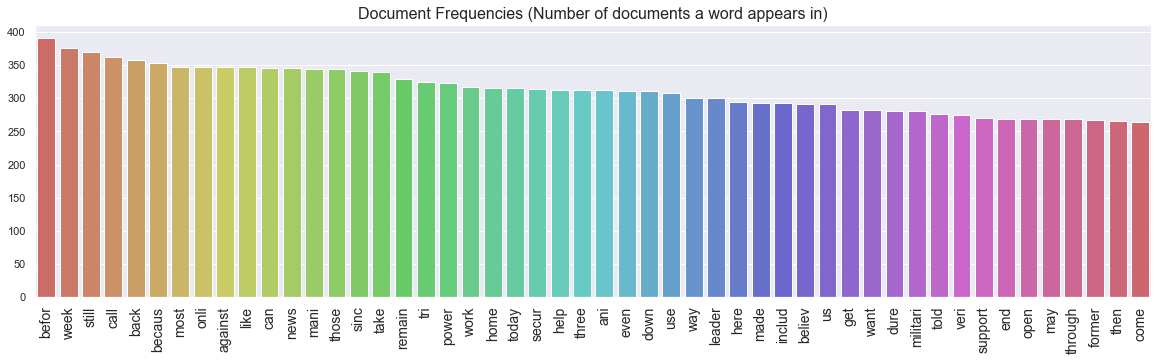

In [86]:
def word_frequency_barplot(df, nr_top_words=50):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sns.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words], palette='hls', ax=ax)

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax
cleansed_words_df = pd.DataFrame.from_dict(dictionary.token2id, orient='index')
cleansed_words_df.rename(columns={0: 'id'}, inplace=True)

cleansed_words_df['count'] = list(map(lambda id_: dictionary.dfs.get(id_), cleansed_words_df.id))
del cleansed_words_df['id']
cleansed_words_df.sort_values('count', ascending=False, inplace=True)
cleansed_words_df
ax = word_frequency_barplot(cleansed_words_df)
ax.set_title("Document Frequencies (Number of documents a word appears in)", fontsize=16);

### from gensim.models.ldamulticore import LdaMulticore

In [92]:
corpus_for_lda=raw_train_data.bow

num_topics = 50
#A multicore approach to decrease training time
LDAmodel = LdaMulticore(corpus=corpus_for_lda,
                        id2word=dictionary,
                        num_topics=num_topics,
                        workers=4,
                        chunksize=4000,
                        passes=7,
                        alpha='asymmetric')

## word2vec feat.logistic